In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# 데이터 가져오기

In [4]:
df = pd.read_csv('data/최종데이터.csv', index_col=0)

In [5]:
df.head(3)

,date,tesla,tesla_거래량,tesla_volatility,elec_fee,oli_price,oli_price_volatility,carbon_credits,carbon_credits_volatility,EVE종가,...,alu_price,alu_vol,alu_change,cu_price,cu_change,REGI_price,REGI_vol,REGI_change,검색량,updown
0,2015-01-02,43.86,23820.0,-1.39,6.67,52.69,-3.44,7.01,-3.31,13.38,...,1828.00,31.38,-1.12,6250.25,-0.55,9.79,436.60,0.82,22,0
1,2015-01-05,42.02,26840.0,-4.20,6.67,50.04,-5.03,6.90,-1.57,13.38,...,1812.25,43.25,-0.86,6142.00,-1.73,9.55,481.67,-2.45,19,0
2,2015-01-06,42.26,31310.0,0.57,6.67,47.93,-4.22,6.77,-1.88,13.89,...,1780.25,56.01,-1.77,6131.00,-0.18,9.12,534.76,-4.50,23,1


In [6]:
# linear모델의 경우 2019년 이후 데이터로 모델생성

In [7]:
df_2019 = df.iloc[1027:]

In [8]:
df_2019.reset_index(drop=True, inplace=True)

In [9]:
# 다음날 주가 예측

In [10]:
y = df_2019.tesla[5:]
x = df_2019.drop(['tesla', 'tesla_volatility', 'updown', 'date'], axis=1)[:-5]

In [11]:
x_train = x[:640]
x_test = x[640:]
y_train = y[:640]
y_test = y[640:]

In [12]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

models = [lr, rid, las]

for model in models:
    
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    
    print(model.__class__.__name__)
    print(r2_score(y_test, preds))
    print(np.sqrt(mean_squared_error(y_test, preds)))

LinearRegression
-1.4053030716586359
242.97856414714903
Ridge
-1.4293125460274405
244.18824575155384
Lasso
-1.7776140487614605
261.10729668838616


C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.248e+05, tolerance: 4.507e+03
  model = cd_fast.enet_coordinate_descent(


In [13]:
# scalering 후 머신러닝

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(x_train)

StandardScaler()

In [17]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

models = [lr, rid, las]

for model in models:
    
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    
    print(model.__class__.__name__)
    print(r2_score(y_test, preds))
    print(np.sqrt(mean_squared_error(y_test, preds)))

LinearRegression
-1.4053030666532762
242.9785638943337
Ridge
-2.5775836633866547
296.33159440438817
Lasso
-2.1554799094807158
278.30164160177543


In [19]:
# 주가 변동폭 예측

In [20]:
df.head(3)

,date,tesla,tesla_거래량,tesla_volatility,elec_fee,oli_price,oli_price_volatility,carbon_credits,carbon_credits_volatility,EVE종가,...,alu_price,alu_vol,alu_change,cu_price,cu_change,REGI_price,REGI_vol,REGI_change,검색량,updown
0,2015-01-02,43.86,23820.0,-1.39,6.67,52.69,-3.44,7.01,-3.31,13.38,...,1828.00,31.38,-1.12,6250.25,-0.55,9.79,436.60,0.82,22,0
1,2015-01-05,42.02,26840.0,-4.20,6.67,50.04,-5.03,6.90,-1.57,13.38,...,1812.25,43.25,-0.86,6142.00,-1.73,9.55,481.67,-2.45,19,0
2,2015-01-06,42.26,31310.0,0.57,6.67,47.93,-4.22,6.77,-1.88,13.89,...,1780.25,56.01,-1.77,6131.00,-0.18,9.12,534.76,-4.50,23,1


In [21]:
y = df_2019.tesla_volatility[5:]
x = df_2019.drop(['tesla', 'tesla_volatility', 'updown', 'date'], axis=1)[:-5]

In [22]:
x_train = x[:640]
x_test = x[640:]
y_train = y[:640]
y_test = y[640:]

In [23]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

models = [lr, rid, las]

for model in models:
    
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    
    print(model.__class__.__name__)
    print(r2_score(y_test, preds))
    print(np.sqrt(mean_squared_error(y_test, preds)))

LinearRegression
-18.478282877128564
15.947951659661706
Ridge
-15.508934301433754
14.682131039245675
Lasso
-0.0035090645365010165
3.61984709606926


In [24]:
# 전처리

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(x_train)

StandardScaler()

In [28]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

models = [lr, rid, las]

for model in models:
    
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    
    print(model.__class__.__name__)
    print(r2_score(y_test, preds))
    print(np.sqrt(mean_squared_error(y_test, preds)))

LinearRegression
-18.478282877128564
15.947951659661706
Ridge
-15.508934301433754
14.682131039245675
Lasso
-0.0035090645365010165
3.61984709606926


# classification을통한 주가 상승/하락 예측

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score
from sklearn import svm
from lightgbm import LGBMClassifier
import xgboost as xgb

### 전처리된 데이터 가져오기

In [163]:
df = pd.read_csv('prepro_data/최종+재무제표.csv', index_col=0)

In [140]:
df.head(3)

,date,tesla,tesla_거래량,tesla_volatility,elec_fee,oli_price,oli_price_volatility,carbon_credits,carbon_credits_volatility,EVE종가,...,매출원가,매출총이익,영업이익,순이익,자산총계,매출총이익률,영업이익률,주당순이익EPS(달러),주가수익배수PER(배),총자산이익률ROA(%)
0,2015-03-31,37.75,25130.0,-0.94,6.83,47.60,-2.22,6.92,0.58,20.09,...,2531.000000,987.0,-245.000000,-398.000000,6120.000000,28.055713,-6.964184,-0.640000,-59.590000,-7.100000
1,2015-04-01,37.52,18970.0,-0.61,6.61,50.09,5.23,7.14,3.18,21.49,...,2533.936508,987.0,-247.253968,-399.952381,6125.523810,28.033465,-7.019530,-0.643016,-59.677778,-7.125397
2,2015-04-02,38.20,25050.0,1.81,6.61,49.14,-1.90,7.15,0.14,21.66,...,2536.873016,987.0,-249.507937,-401.904762,6131.047619,28.011217,-7.074876,-0.646032,-59.765556,-7.150794


### 모든 칼럼을 넣어 모델 돌려보기

In [167]:
y = df.updown[5:]
x = df.drop(['date', 'updown'], axis=1)[:-5]

### train, test 비율 8:2 

In [168]:
x_train = x[:1444]
x_test = x[1444:]
y_train = y[:1444]
y_test = y[1444:]

### Classification 모델을 다양하게 돌려보기

In [171]:
lg = LogisticRegression()
rfc = RandomForestClassifier()
svc = svm.SVC()
lgbm = LGBMClassifier()
gbs = GradientBoostingClassifier()
xgbs = xgb.XGBClassifier()

models = [lg, rfc, svc, lgbm, gbs, xgbs]

for model in models:
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(model.__class__.__name__)
    print('accuracy_score :', accuracy_score(y_test, preds))
    print('f1_score :', f1_score(y_test, preds))
    #print('classification_report :', classification_report(y_test, preds)) 

LogisticRegression
accuracy_score : 0.5363128491620112
f1_score : 0.6970802919708029
RandomForestClassifier
accuracy_score : 0.5251396648044693
f1_score : 0.6046511627906976
SVC
accuracy_score : 0.5363128491620112
f1_score : 0.6981818181818182
LGBMClassifier
accuracy_score : 0.5446927374301676
f1_score : 0.6733466933867736
GradientBoostingClassifier
accuracy_score : 0.5614525139664804
f1_score : 0.6974951830443161
[12:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
accuracy_score : 0.5195530726256983
f1_score : 0.5763546798029556


### 스케일링

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
scaler = StandardScaler()

In [174]:
scaler.fit(x_train)

StandardScaler()

In [175]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [176]:
for model in models:
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    print(model.__class__.__name__)
    print('accuracy_score :', accuracy_score(y_test, preds))
    print('roc_auc_score :', roc_auc_score(y_test, preds))

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
accuracy_score : 0.5391061452513967
roc_auc_score : 0.5384977409638554
RandomForestClassifier
accuracy_score : 0.5167597765363129
roc_auc_score : 0.4968624497991968
SVC
accuracy_score : 0.5363128491620112
roc_auc_score : 0.5
LGBMClassifier
accuracy_score : 0.5586592178770949
roc_auc_score : 0.5310303714859438
GradientBoostingClassifier
accuracy_score : 0.5363128491620112
roc_auc_score : 0.5044866967871486
[12:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
accuracy_score : 0.5223463687150838
roc_auc_score : 0.5151229919678715


### GridSearch를 사용하여 최적의 파라미터 검색하기
Cross-validation을 사용하여 시계열 데이터 분석에 적합하지 않음

In [149]:
from sklearn.model_selection import GridSearchCV, KFold

In [150]:
param_grid={
    'max_depth':[1,3,5,6,8,10],
    'min_data_in_leaf': [10,15,20,25,30],
    'n_estimators':[100, 200, 300, 400, 500]
}
cv=KFold()
gcv=GridSearchCV(lgbm, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=4)
gcv.fit(x_train, y_train)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_) 

KeyboardInterrupt: 

In [ ]:
em = gcv.best_estimator_

In [ ]:
em.fit(x_train, y_train)

In [ ]:
em.score(x_test, y_test)

### 폰트 설정

In [177]:
plt.rcParams['font.family'] = 'Malgun Gothic'

### 피쳐 중요도 구하기

In [154]:
from lightgbm import plot_importance

In [155]:
sorted_idx = lgbm.feature_importances_.argsort()

In [156]:
x.iloc[:, sorted_idx].columns

Index(['자산총계', '총자산이익률ROA(%)', '매출총이익', '매출액', '영업이익률', 'li_price', 'PSI종가',
       '매출원가', 'SGL종가', 'LIT조정종가', '영업이익', 'SOXX종가', 'co', '매출총이익률',
       '주가수익배수PER(배)', 'alu_price', 'elec_fee', 'SOXL종가', '희토류가격',
       '주당순이익EPS(달러)', 'nasdaq', '순이익', 'carbon_credits', 'REGI_price',
       'EVE종가', 'oli_price', 'tesla', 'LIT거래량', 'ssec', 'cu_price', '검색량',
       'dollar', 'BYD종가', 'BYD거래량', 'nasdaq_volatility', 'EVE거래량',
       'co_volatility', 'tesla_거래량', 'SGL변동률', 'ssec_거래량', 'SOXL거래량',
       'alu_vol', 'EVE변동률', 'BYD변동률', 'nasdaq_거래량', 'tesla_volatility',
       'carbon_credits_volatility', 'REGI_change', 'cu_change', 'SOXX거래량',
       'oli_price_volatility', 'REGI_vol', 'PSI거래량', 'dollar_volatility',
       'alu_change', 'ssec_volatility'],
      dtype='object')

### 칼럼 조합별 최고 accuracy 구하기

In [182]:
from itertools import combinations

In [183]:
# columns_li = list(combinations(x.columns,5))

In [184]:
# len(columns_li)

In [185]:
# models = [lgbm, xgbs]

# y = df.updown[5:]
# y_train = y[:1444]
# y_test = y[1444:]
# best_score = 0
# over55 = []
# for li in columns_li:
#     x = df.loc[:, li][:-5]
#     x_train = x[:1444]
#     x_test = x[1444:]
#     for model in models:
#         model.fit(x_train, y_train)
#         preds = model.predict(x_test)
#         accuracy = accuracy_score(y_test, preds)
#         print(model.__class__.__name__)
#         print('accuracy_score :', accuracy)
#         if accuracy >= best_score:
#             best_score = accuracy
#             best_etstimate = li
#             print('=' * 50)
#             print('현재 best_score :', best_score)
#             print('현재 best_etstimate :', best_etstimate)
#             print('=' * 50)
#         if accuracy > 0.55:
#             over55.append([model, accuracy, li])

In [186]:
# best_score
# best_etstimate

### 최고의 조합 사용하기

In [199]:
y = df.updown[5:]
x = df.drop(['date', 'updown'], axis=1)[:-5]
x = x.loc[:, ['tesla', 'tesla_거래량', 'oli_price', 'EVE거래량', 'alu_change']]

In [200]:
x_train = x[:1444]
x_test = x[1444:]
y_train = y[:1444]
y_test = y[1444:]

In [201]:
lgbm.fit(x_train, y_train)
preds = lgbm.predict(x_test)
prob = lgbm.predict_proba(x_test)
prob = prob[:, 1]
print(model.__class__.__name__)
print('accuracy_score :', accuracy_score(y_test, preds))
print('f1_score :', f1_score(y_test, preds))
print(classification_report(y_test, preds)) 

XGBClassifier
accuracy_score : 0.6201117318435754
f1_score : 0.5952380952380953
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       166
           1       0.69      0.52      0.60       192

    accuracy                           0.62       358
   macro avg       0.63      0.63      0.62       358
weighted avg       0.64      0.62      0.62       358



### 피쳐별 중요도 시각화

In [190]:
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve

[Text(0, 0, 'tesla'),
 Text(0, 1, 'tesla_거래량'),
 Text(0, 2, 'oli_price'),
 Text(0, 3, 'EVE거래량'),
 Text(0, 4, 'alu_change')]

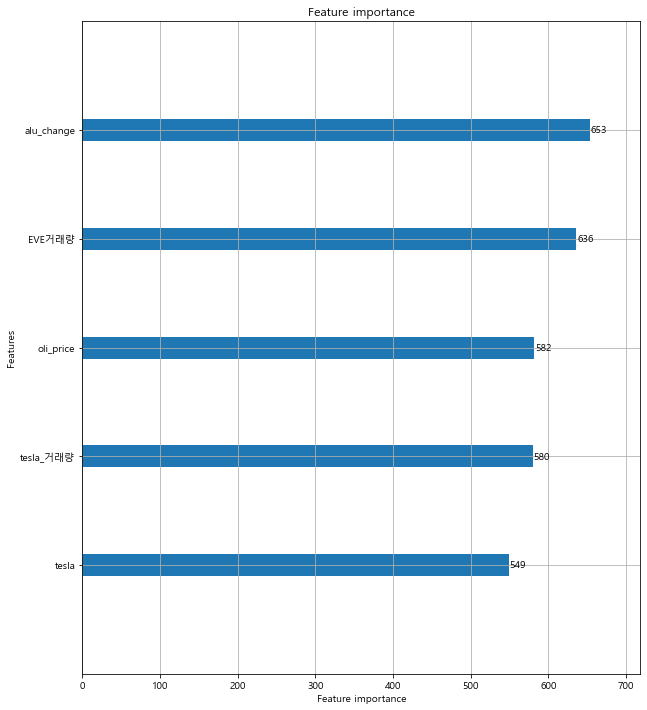

In [191]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm, ax=ax).set_yticklabels(x.columns)

### confusion_matrix 시각화

In [193]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [194]:
cm = confusion_matrix(y_test, preds)
cm

array([[122,  44],
       [ 92, 100]], dtype=int64)

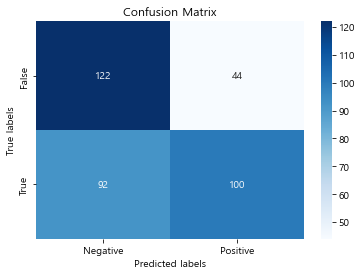

In [195]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['False', 'True']);

### ROC 그래프 시각화
ROC 그래프는 가로축을 FP Rate (Specificity) 값의 비율로 하고 \
세로축을 TP Rate (Sensitive) 로 하여 시각화 한 그래프이다. \

Specificity - Negative 로 판단한것중에, 실제 Negative 값의 비율이다. \
Sensitive - 원래 Positive 데이타 수에서 Positive로 분류된 수

In [196]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

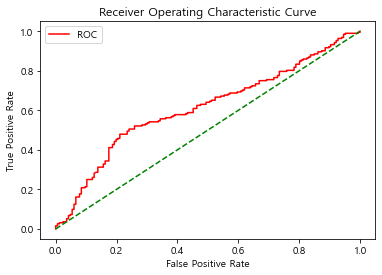

In [197]:
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)

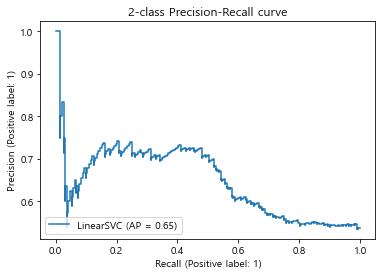

In [198]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    lgbm, x_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")